In [27]:
import pandas as pd
import glob
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

def count_duplicates_in_list(lst):
    # Count occurrences of each element in the list
    element_counts = Counter(lst)
    
    # Count number of elements that occur more than once
    duplicates_count = sum(1 for count in element_counts.values() if count > 1)
    
    return duplicates_count

/tmp/ipykernel_1130355/160624306.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [28]:
translation = {"x_0":"Season",
               "x_1":"Year",
               "x_2": "Month",
               "x_3": "Holiday",
               "x_4": "Weekday", 
               "x_5": "Working day",
               "x_6": "Weather Situation",
               "x_7": "Temperature",
               "x_8": "Feeling Temperature",
               "x_9": "Humidity",
               "x_10": "Windspeed"}

def replace_translation(stri, d, reverse):

    for k in sorted(d.keys(), reverse=reverse):
        stri = stri.replace(str(k), str(d[k]))
    return stri

In [29]:
dataset = "bike"

def extract_substrings(text):
    return re.findall(r'func\[(.*?)\]', text)

functions = []
for filename in glob.glob("./results/MOSO/*_SO_bike.csv"):
    nr = filename.split("/")[-1].split("_")[0]
    d_key = "_".join(filename.split("/")[-1].split("_")[1:]).replace(dataset,"").replace(".csv","")
    df = pd.read_csv(filename, sep="\t", header=None)
    
    
    substrings = extract_substrings(df.iloc[0][5])
    if (count_duplicates_in_list(substrings)>0):
        print(substrings[0])
        functions.append(replace_translation(substrings[0], translation, True))
        
    
    


In [30]:
instance = {"Season":1,
"Year":0,
"Month":1,
"Holiday":0,
"Weekday":6,
"Working day":0,
"Weather Situation":"x",
"Temperature":0.34,
"Feeling Temperature":0.36,
"Humidity": 0.8,
"Windspeed":0.16}

functional = {
    "sin":"np.sin",
    "sqrt":"np.sqrt",
    "cos":"np.cos",
    "ln":"np.log",
    "func[(": "",
    ")]": ""
}

In [31]:
print(functions[2])
function = replace_translation(functions[2], instance, False)
function = replace_translation(function, functional, False)

IndexError: list index out of range

In [32]:
func = lambda x: eval(function)
x = np.linspace(0,4,100)
y = func(x)
plt.figure()
plt.xlabel("Weather Situation")
xtick_locations = [1,2,3,4]
xtick_labels = ["Clear Skies", "Misty", "Rain", "Heavy Rain"]
plt.xticks(xtick_locations, xtick_labels)
plt.ylabel("Function value")
plt.plot(x,y)
plt.show()

SyntaxError: unexpected EOF while parsing (<string>, line 1)

In [33]:
dataset = "bike"

def extract_substrings(text):
    return re.findall(r'func\[(.*?)\]', text)

functions = []
for filename in glob.glob("./results/cmp/*_MO_*k2*_bike.csv"):
    nr = filename.split("/")[-1].split("_")[0]
    d_key = "_".join(filename.split("/")[-1].split("_")[1:]).replace(dataset,"").replace(".csv","")
    df = pd.read_csv(filename, sep="\t", header=None)
    
    
    substrings = extract_substrings(df.iloc[0][5])
    if (count_duplicates_in_list(substrings)>0):
        print(substrings[0])
        print("")
        functions.append(replace_translation(substrings[0], translation, True))
        
    

((sin((x_7*2.487035275))-(sin(x_6)/(-8.329465866+4.498615265)))-(((x_10+x_10)-(x_9/2.063561201))/sqrt((4.981196404/x_10))))

(func[(sin(((x_9-x_3)+(x_6-0.360522866)))+(ln(sqrt(x_2))-((-0.768530607/x_0)*(-0.194104627*x_2))))

((func[((((x_1*0.801548302)-(x_6/7.475599289))-cos((-4.854018211*x_7)))+(sin((x_9-4.666962624))+sin(sin(x_6))))

(cos(func[((sqrt(x_0)/sqrt(sqrt(82.295372009)))+(x_1-((x_10*x_6)-(-1.663953066-x_9))))

sin((sin(x_7)*sqrt((x_0--4.987145901))))

(x_10*cos(((x_6/-0.572346926)*(x_9*x_9))))

((((any[cos(func[(((cos(x_7)/(x_0+-1.317368269))-((-24.031814575+x_3)+(x_3+x_7)))+sin(((-8.684989929*x_7)/(x_7/x_6))))

((sin((-3.531510115-x_6))+(func[(((func[sin((sqrt((7.355690956-x_3))*x_7))

(((func[((((65.608375549-x_4)*sin(-0.173476800))-(sin(x_6)*(-4.226649284-x_3)))+cos(((x_9*-2.886904240)+cos(x_9))))

sin((cos(sin(x_7))*-5.585355759))

(((func[((sin((x_7*-8.060747147))*(func[(sin((sqrt(x_6)+(x_6*x_10)))*(((x_1-x_10)/cos(0.466997832))-sin((x_7-2.576249599))))

((func[((sin((

In [38]:
instance = {"Season":1,
"Year":0,
"Month":1,
"Holiday":0,
"Weekday":6,
"Working day":0,
"Weather Situation":2,
"Temperature":"x",
"Feeling Temperature":0.36,
"Humidity": 0.8,
"Windspeed":0.16}

functional = {
    "sin":"np.sin",
    "sqrt":"np.sqrt",
    "cos":"np.cos",
    "ln":"np.log",
    "func[(": "",
    ")]": ""
}

In [39]:
print(functions[2])
function = replace_translation(functions[2], instance, False)
function = replace_translation(function, functional, False)[1:]
print(function)

((func[((((Year*0.801548302)-(Weather Situation/7.475599289))-cos((-4.854018211*Temperature)))+(sin((Humidity-4.666962624))+sin(sin(Weather Situation))))
((((0*0.801548302)-(2/7.475599289))-np.cos((-4.854018211*x)))+(np.sin((0.8-4.666962624))+np.sin(np.sin(2))))


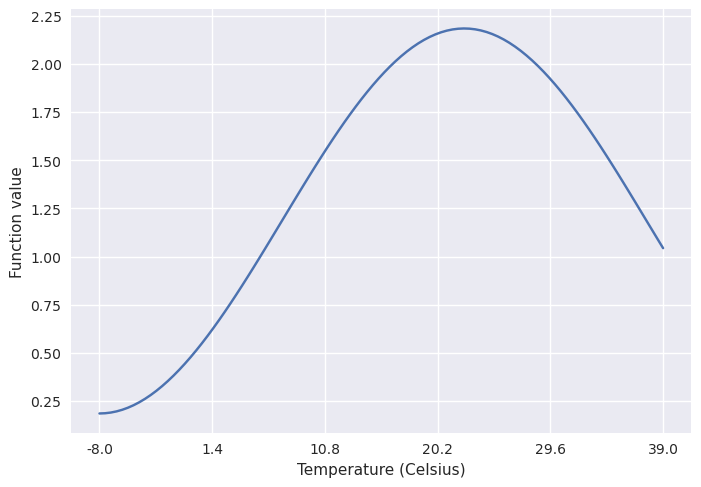

In [45]:
func = lambda x: eval(function)
x = np.linspace(0,1,100)
y = func(x)
plt.figure()
plt.xlabel("Temperature (Celsius)")
xtick_locations = [0.,0.2,0.4,0.6,0.8,1.0]
conversion = lambda z: z * 47 - 8
xtick_labels = ["{:.1f}".format(conversion(z)) for z in xtick_locations]
plt.xticks(xtick_locations, xtick_labels)
plt.ylabel("Function value")
plt.plot(x,y)
plt.show()